In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'C:/Users/User/application_train.csv'
dir_data_T = 'C:/Users/User/application_test.csv'
f_app_train = os.path.join(dir_data)
f_app_test = os.path.join(dir_data_T)

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
app_train.corr()['TARGET']

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [5]:
import heapq

In [21]:
ma= heapq.nsmallest(15, app_train.corr()['TARGET'])


In [22]:
print(list(ma))

[-0.17891869762805598, -0.1604716716054463, -0.15531712606409276, -0.07823930831003195, -0.05659264414103528, -0.05470405317879923, -0.04620942278701308, -0.04598707841544573, -0.04598707841544573, -0.044003370532464434, -0.043767921047647734, -0.04322626321389568, -0.042201360014049866, -0.040593950873398434, -0.039645281169414404]


In [23]:
mi= heapq.nlargest(15, app_train.corr()['TARGET'])

In [24]:
print(list(mi))

[1.0, 0.07495845742555217, 0.060892667564898695, 0.058899014945840766, 0.05748118481848564, 0.0552184835135491, 0.05471268197162485, 0.05145717260719229, 0.050994464367959576, 0.04982373084836387, 0.04598221971656028, 0.04439537480589986, 0.044346346851488506, 0.04301895495533558, 0.04197486283152581]


In [14]:
app_train.corr()['EXT_SOURCE_3']

SK_ID_CURR                                  0.000222
TARGET                                     -0.178919
NAME_CONTRACT_TYPE                         -0.005762
FLAG_OWN_CAR                               -0.015503
FLAG_OWN_REALTY                             0.040281
CNT_CHILDREN                               -0.042710
AMT_INCOME_TOTAL                           -0.030229
AMT_CREDIT                                  0.043516
AMT_ANNUITY                                 0.030752
AMT_GOODS_PRICE                             0.047717
REGION_POPULATION_RELATIVE                 -0.006001
DAYS_BIRTH                                  0.205478
DAYS_EMPLOYED                              -0.129722
DAYS_REGISTRATION                          -0.107549
DAYS_ID_PUBLISH                            -0.131597
OWN_CAR_AGE                                -0.014604
FLAG_MOBIL                                       NaN
FLAG_EMP_PHONE                             -0.115293
FLAG_WORK_PHONE                            -0.

ValueError: x and y must have same first dimension, but have shapes (1,) and (244,)

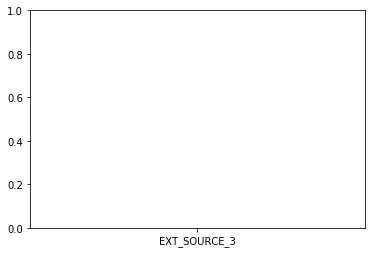

In [18]:
plt.plot('EXT_SOURCE_3', app_train.corr()['TARGET'], '.')